In [1]:
import numpy as np
import matplotlib.pyplot as plt
import function as func
import os
import lmfit
import math
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [4]:
def get_delta(time):
    delta = str(time - datetime(year=2021, month=11, day=27, hour=0))
    if "day" in delta:
        day = float(delta.split(" ")[0])*24
        delta = delta.split(" ")[2]
        hour = float(delta.split(":")[0])
        minute = float(delta.split(":")[1])/60
        second = float(delta.split(":")[2])/3600
        return day + hour + minute + second
    else:
        hour = float(delta.split(":")[0])
        minute = float(delta.split(":")[1])/60
        second = float(delta.split(":")[2])/3600
        return hour + minute + second

2021-11-27 00:00:00
2021-11-27 12:00:00
12:00:00


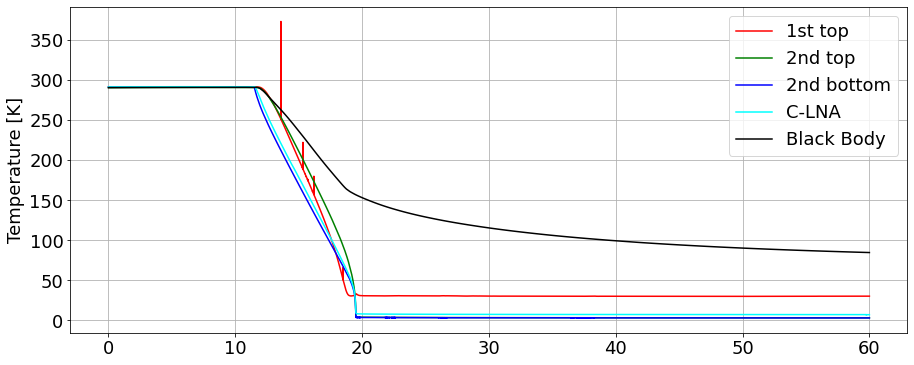

In [5]:
tmp1 = np.zeros(0)
tmp2 = np.zeros(0)
tmp3 = np.zeros(0)
tmp4 = np.zeros(0)
tmp5 = np.zeros(0)
dt = np.zeros(0)

base = datetime(year=2021, month=11, day=27, hour=0)
time = datetime.strptime("2021/11/27 12:00:00", '%Y/%m/%d %H:%M:%S')
print(base)
print(time)
print(time - base)

for date in ["11-27AM", "11-27PM", "11-28AM", "11-28PM", "11-29AM"]:
    with open('/data/temperature/data_2021-{}.dat'.format(date)) as f:
        data = f.readlines()
        for line in data:
            if line[:1] != "#" and len(line.split(" ")) == 17:
                tmp1 = np.append(tmp1, float(line.split()[9]))
                tmp2 = np.append(tmp2, float(line.split()[6]))
                tmp3 = np.append(tmp3, float(line.split()[3]))
                tmp4 = np.append(tmp4, float(line.split()[12]))
                tmp5 = np.append(tmp5, float(line.split()[15]))
                
                dt = np.append(dt, get_delta(datetime.strptime(line[:19], '%Y/%m/%d %H:%M:%S')))
            
plt.figure(figsize=(15,6))
plt.rcParams["font.size"] = 18

plt.plot(dt, tmp2, color='red', label="1st top") # 40k top
plt.plot(dt, tmp1, color='green', label="2nd top") # 4k top
plt.plot(dt, tmp4, color='blue', label="2nd bottom") # 4k bottom
plt.plot(dt, tmp5, color='cyan', label="C-LNA") # C-LNA
plt.plot(dt, tmp3, color='black', label="Black Body") # 4k black body


plt.ylabel('Temperature [K]')
plt.legend()
plt.grid()
#plt.gcf().autofmt_xdate()

#plt.savefig("../result_figure/temperature.pdf")

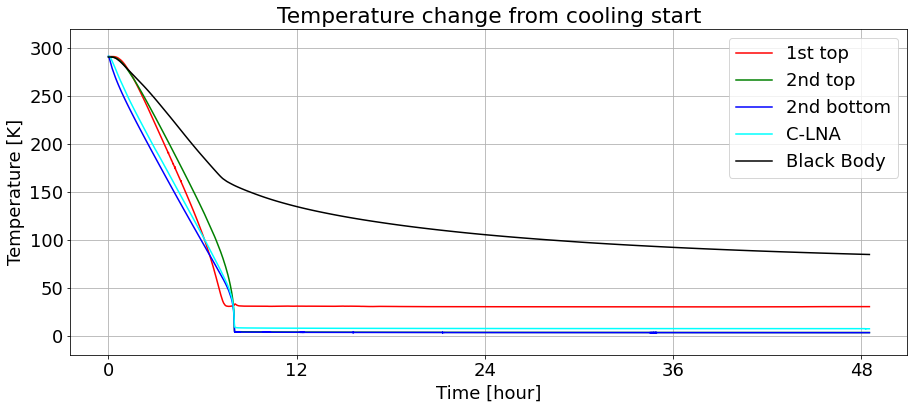

In [22]:
plt.figure(figsize=(15,6))
plt.rcParams["font.size"] = 18

start = 13870

plt.plot(dt_1st, tmp_1st, color='red', label="1st top") # 40k top
plt.plot(dt[start:] - dt[start], tmp1[start:], color='green', label="2nd top") # 4k top
plt.plot(dt[start:] - dt[start], tmp4[start:], color='blue', label="2nd bottom") # 4k bottom
plt.plot(dt[start:] - dt[start], tmp5[start:], color='cyan', label="C-LNA") # C-LNA
plt.plot(dt[start:] - dt[start], tmp3[start:], color='black', label="Black Body") # 4k black body

plt.title("Temperature change from cooling start")
plt.ylabel("Temperature [K]")
plt.xlabel("Time [hour]")
plt.legend()
plt.grid()
plt.ylim([-20, 320])
plt.xticks([0, 12, 24, 36, 48])

plt.savefig("../result_figure/temperature.pdf")

2564
4668
5710
8497


IndexError: index 58667 is out of bounds for axis 0 with size 58667

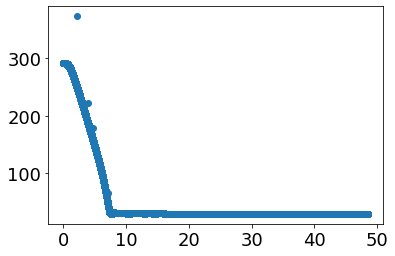

In [15]:
plt.scatter(dt[start:] - dt[start], tmp2[start:])
#plt.xlim([2.1,2.15])

for i in range(len(tmp2[start:])):
    if tmp2[start:][i] > tmp2[start:][i+1] + 1:
        print(i)
        

In [20]:
dt_1st = dt[start:] - dt[start]
tmp_1st = tmp2[start:]

for i in [2564, 4667, 5708, 8494]:
    dt_1st = np.delete(dt_1st, i)
    tmp_1st = np.delete(tmp_1st, i)

250.87


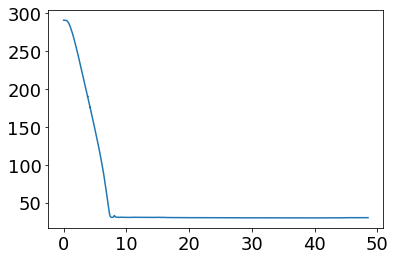

In [21]:
plt.plot(dt_1st, tmp_1st)
print(tmp_1st[2564])